In [2]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt

In [6]:
# 국민여가활동조사

culture_survey_2018,meta18= pyreadstat.read_sav('2018 국민여가활동조사_공표용_DATA.sav')
culture_survey_2019,meta19= pyreadstat.read_sav('2019 (rawdata)국민여가활동조사_공표용.sav')
culture_survey_2020, meta20 = pyreadstat.read_sav(" 2020년_국민여가활동조사데이터_공표용.sav") #['ID','참여여부','연령']

# 문2.지난 1년간 가장 많이 참여한 여가활동 (1순위)

In [7]:
cs_2018 = culture_survey_2018[['Q2A1','AGE_G1']]
cs_2019 = culture_survey_2019[['q2_1_n2','DM2']]  # 여가활동 1순위, 연령대
cs_2020 = culture_survey_2020[['q2_1_n2','DM2']] 

In [8]:
#2020년도 여가활동 1순위
cs_2020 = culture_survey_2020[['q2_1_n2','DM2']] 
cs_2020 = cs_2020.groupby(['q2_1_n2']).count()
cs_2020 = cs_2020[cs_2020['DM2']>=150]
cs_2020 = cs_2020.sort_values(by='DM2',ascending=False)

cs_2020.index=['TV시청(IPTV 포함)','인터넷 검색/1인 미디어 제작/SNS','산책 및 걷기',
               '모바일 컨텐츠, 동영상, VOD 시청','게임(온라인/모바일/콘솔게임 등)','헬스(보디빌딩)/에어로빅',
               '잡담/통화하기/문자보내기','영화관람','음악 감상',
               '스포츠 경기 간접관람- TV,DMB를 통한관람(축구, 야구, 농구, 배구 등)']
#2020순위: 74, 58, 71, 75, 59, 29, 84, 7, 77, 17



#2019년도 여가활동 1순위
cs_2019 = cs_2019.groupby(['q2_1_n2']).count()

cs_2019=pd.DataFrame(cs_2019)
cs_2019 = cs_2019.loc[[74, 58, 71, 75, 59, 29, 84, 7, 77, 17]]
cs_2019.index=['TV시청(IPTV 포함)','인터넷 검색/1인 미디어 제작/SNS','산책 및 걷기',
               '모바일 컨텐츠, 동영상, VOD 시청','게임(온라인/모바일/콘솔게임 등)','헬스(보디빌딩)/에어로빅',
               '잡담/통화하기/문자보내기','영화관람','음악 감상',
               '스포츠 경기 간접관람- TV,DMB를 통한관람(축구, 야구, 농구, 배구 등)']
cs_2019 = cs_2019.sort_values(by='DM2',ascending=False)



#2018년도 여가활동 1순위
cs_2018 = cs_2018.groupby(['Q2A1']).count()
cs_2018=pd.DataFrame(cs_2018)
cs_2018 = cs_2018.loc[[73, 58, 70, 74, 59, 29, 83, 7, 76, 17]]

cs_2018.index=['TV시청(IPTV 포함)','인터넷 검색/1인 미디어 제작/SNS','산책 및 걷기',
               '모바일 컨텐츠, 동영상, VOD 시청','게임(온라인/모바일/콘솔게임 등)','헬스(보디빌딩)/에어로빅',
               '잡담/통화하기/문자보내기','영화관람','음악 감상',
               '스포츠 경기 간접관람- TV,DMB를 통한관람(축구, 야구, 농구, 배구 등)']

cs_2018 = cs_2018.sort_values(by='AGE_G1',ascending=False)

In [9]:
cs = pd.concat([cs_2018,cs_2019,cs_2020],axis=1)
cs.columns=['2018','2019','2020']
cs.index=[1,2,3,4,5,6,7,8,9,10]
cs

,2018,2019,2020
1,5093,4677,3846
2,1407,1493,896
3,529,377,560
4,461,417,706
5,406,552,218
6,278,204,283
7,203,234,182
8,144,126,158
9,79,26,208
10,20,386,689


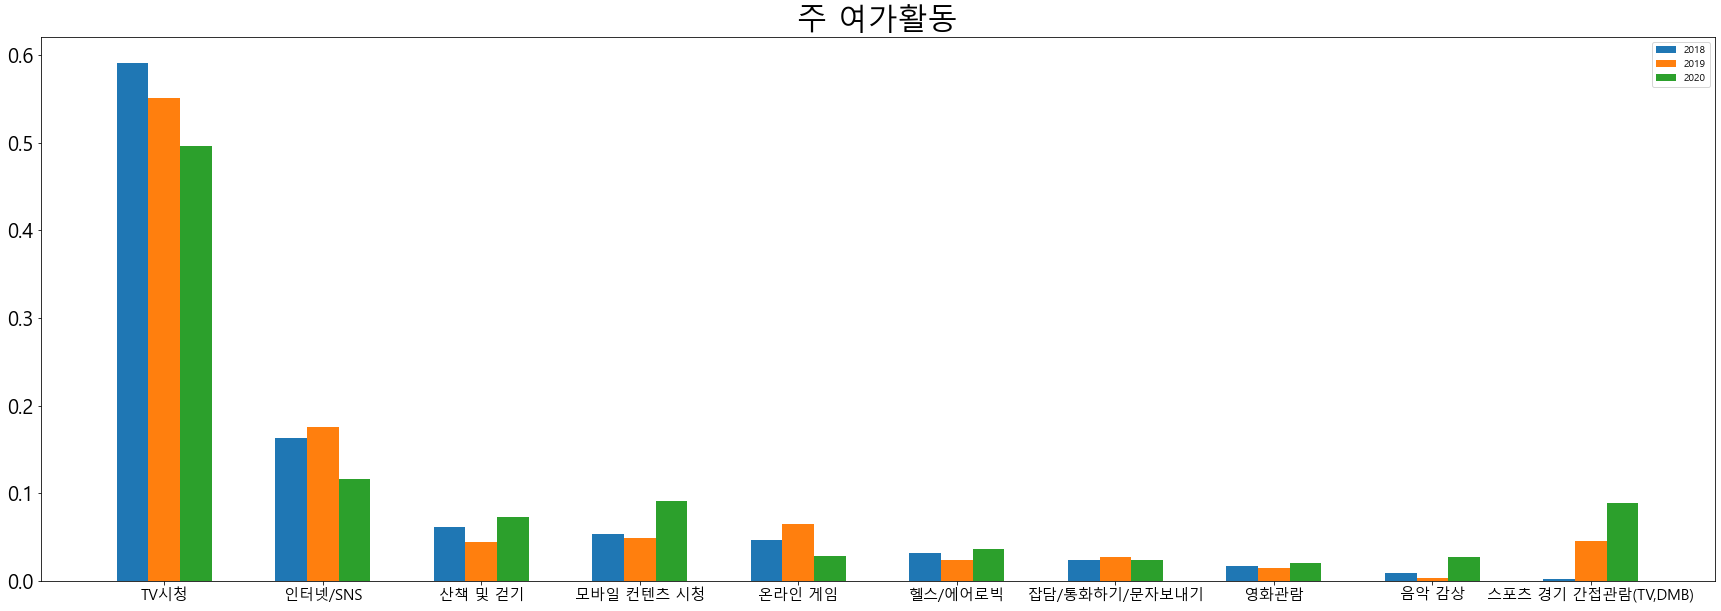

In [95]:
plt.figure(figsize=(30,10))

label=['TV시청','인터넷/SNS','산책 및 걷기',
               '모바일 컨텐츠 시청','온라인 게임','헬스/에어로빅',
               '잡담/통화하기/문자보내기','영화관람','음악 감상',
               '스포츠 경기 간접관람(TV,DMB)']


plt.bar(cs.index-0.2,cs['2018']/cs['2018'].sum(),width=0.2,label = '2018')
plt.bar(cs.index,cs['2019']/cs['2019'].sum(),width=0.2,label = '2019')
plt.bar(cs.index+0.2,cs['2020']/cs['2020'].sum(),width=0.2,label = '2020')


plt.xticks(cs.index,label,size=15)
plt.yticks(size=20)
plt.rc('font',family='Malgun Gothic')
plt.title('주 여가활동',size=30)
plt.legend()
plt.show()


#연령별로 산책이 얼마나 늘었는지

# 가장 만족한 여가활동

In [265]:
manzoc_2018 = culture_survey_2018[['Q4A1','AGE_G1']]
manzoc_2019 = culture_survey_2019[['q4','DM2']]  # 여가활동 1순위, 연령대
manzoc_2020 = culture_survey_2020[['q4','DM2']] 

In [266]:
#2020 1순위
manzoc_2020_1 = culture_survey_2020[['q4','DM2']] 
manzoc_2020_1 = manzoc_2020_1.groupby(['q4']).count()
manzoc_2020_1 = manzoc_2020_1.loc[[71,86,59,63,29,7,55,81,58]]
manzoc_2020_1.columns=['first']

manzoc_2020_1.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']



#2020 2순위
manzoc_2020_2 = culture_survey_2020[['q4_m2','DM2']]
manzoc_2020_2 = manzoc_2020_2.groupby(['q4_m2']).count()
manzoc_2020_2=pd.DataFrame(manzoc_2020_2)
manzoc_2020_2 = manzoc_2020_2.loc[[71,86,59,63,29,7,55,81,58]]
manzoc_2020_2.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

manzoc_2020_2.columns=['second']
manzoc_2020_2




#2020 3순위
manzoc_2020_3 = culture_survey_2020[['q4_m3','DM2']]
manzoc_2020_3 = manzoc_2020_3.groupby(['q4_m3']).count()
manzoc_2020_3=pd.DataFrame(manzoc_2020_3)
manzoc_2020_3 = manzoc_2020_3.loc[[71,86,59,63,29,7,55,81,58]]
manzoc_2020_3.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

manzoc_2020_3.columns=['third']
manzoc_2020_3




#2020 1순위, 2순위, 3순위 합
manzoc_2020 = pd.concat([manzoc_2020_1,manzoc_2020_2,manzoc_2020_3],axis=1)
manzoc_2020 = manzoc_2020['first']+manzoc_2020['second']+manzoc_2020['third']
manzoc_2020

산책 및 걷기                 2310
친구만남/이성교제/미팅/소개팅        2068
게임(온라인/모바일/콘솔게임 등)      1145
쇼핑/외식                   1870
헬스(보디빌딩)/에어로빅            716
영화관람                    1071
등산                       899
종교활동                     672
인터넷 검색/1인 미디어 제작/SNS    1075
dtype: int64

In [267]:

#2019 1순위
manzoc_2019_1 = culture_survey_2019[['q4','DM2']]
manzoc_2019_1 = manzoc_2019_1.groupby(['q4']).count()
manzoc_2019_1=pd.DataFrame(manzoc_2019_1)
manzoc_2019_1 = manzoc_2019_1.loc[[71,86,59,63,29,7,55,81,58]]


manzoc_2019_1.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

# manzoc_2019_1 =manzoc_2019_1.sort_values(by='DM2',ascending=False)
manzoc_2019_1.columns=['first']



#2019 2순위
manzoc_2019_2 = culture_survey_2019[['q4_m2','DM2']]
manzoc_2019_2 = manzoc_2019_2.groupby(['q4_m2']).count()

manzoc_2019_2=pd.DataFrame(manzoc_2019_2)
manzoc_2019_2 = manzoc_2019_2.loc[[71,86,59,63,29,7,55,81,58]]


manzoc_2019_2.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

# manzoc_2019_2 =manzoc_2019_2.sort_values(by='DM2',ascending=False)
manzoc_2019_2.columns=['second']




#2019 3순위
manzoc_2019_3 = culture_survey_2019[['q4_m3','DM2']]
manzoc_2019_3 = manzoc_2019_3.groupby(['q4_m3']).count()

manzoc_2019_3=pd.DataFrame(manzoc_2019_3)
manzoc_2019_3 = manzoc_2019_3.loc[[71,86,59,63,29,7,55,81,58]]


manzoc_2019_3.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

# manzoc_2019_3 =manzoc_2019_3.sort_values(by='DM2',ascending=False)
manzoc_2019_3.columns=['third']



#2019 1순위, 2순위, 3순위 합계
manzoc_2019 = pd.concat([manzoc_2019_1,manzoc_2019_2,manzoc_2019_3],axis=1)
manzoc_2019 = manzoc_2019['first']+manzoc_2019['second']+manzoc_2019['third']
manzoc_2019

산책 및 걷기                 1783
친구만남/이성교제/미팅/소개팅        2195
게임(온라인/모바일/콘솔게임 등)       852
쇼핑/외식                   1945
헬스(보디빌딩)/에어로빅            638
영화관람                    1852
등산                       854
종교활동                     750
인터넷 검색/1인 미디어 제작/SNS    1129
dtype: int64

In [268]:
#2018 1순위
manzoc_2018_1 = culture_survey_2018[['Q4A1','AGE_G1']]
manzoc_2018_1 = manzoc_2018_1.groupby(['Q4A1']).count()

manzoc_2018_1=pd.DataFrame(manzoc_2018_1)
manzoc_2018_1 = manzoc_2018_1.loc[[70,86,59,63,29,7,55,80,58]]

manzoc_2018_1.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

# manzoc_2018_1 = manzoc_2018_1.sort_values(by='AGE_G1',ascending=False)
manzoc_2018_1.columns=['first']
manzoc_2018_1






#2018 2순위
manzoc_2018_2 = culture_survey_2018[['Q4A2','AGE_G1']]
manzoc_2018_2 = manzoc_2018_2.groupby(['Q4A2']).count()

manzoc_2018_2=pd.DataFrame(manzoc_2018_2)
manzoc_2018_2 = manzoc_2018_2.loc[[70,86,59,63,29,7,55,80,58]]

manzoc_2018_2.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

# manzoc_2018_2 = manzoc_2018_2.sort_values(by='AGE_G1',ascending=False)
manzoc_2018_2.columns=['second']
manzoc_2018_2






#2018 3순위
manzoc_2018_3 = culture_survey_2018[['Q4A3','AGE_G1']]
manzoc_2018_3 = manzoc_2018_3.groupby(['Q4A3']).count()

manzoc_2018_3=pd.DataFrame(manzoc_2018_3)
manzoc_2018_3 = manzoc_2018_3.loc[[70,86,59,63,29,7,55,80,58]]

manzoc_2018_3.index=['산책 및 걷기',
               '친구만남/이성교제/미팅/소개팅','게임(온라인/모바일/콘솔게임 등)','쇼핑/외식',
               '헬스(보디빌딩)/에어로빅','영화관람','등산',
               '종교활동','인터넷 검색/1인 미디어 제작/SNS']

# manzoc_2018_3 = manzoc_2018_3.sort_values(by='AGE_G1',ascending=False)

manzoc_2018_3.columns=['third']





#2018 1순위, 2순위, 3순위 합계
manzoc_2018 = pd.concat([manzoc_2018_1,manzoc_2018_2,manzoc_2018_3],axis=1)
manzoc_2018 = manzoc_2018_1['first']+manzoc_2018_2['second']+manzoc_2018_3['third']
manzoc_2018

산책 및 걷기                 1628
친구만남/이성교제/미팅/소개팅        2002
게임(온라인/모바일/콘솔게임 등)       980
쇼핑/외식                   1938
헬스(보디빌딩)/에어로빅            734
영화관람                    1761
등산                      1037
종교활동                     671
인터넷 검색/1인 미디어 제작/SNS    1089
dtype: int64

In [269]:
manzoc = pd.concat([manzoc_2018,manzoc_2019,manzoc_2020],axis=1)
manzoc.columns=['2018','2019','2020']
manzoc.index=[1,2,3,4,5,6,7,8,9]

,2018,2019,2020
1,1628,1783,2310
2,2002,2195,2068
3,980,852,1145
4,1938,1945,1870
5,734,638,716
6,1761,1852,1071
7,1037,854,899
8,671,750,672
9,1089,1129,1075


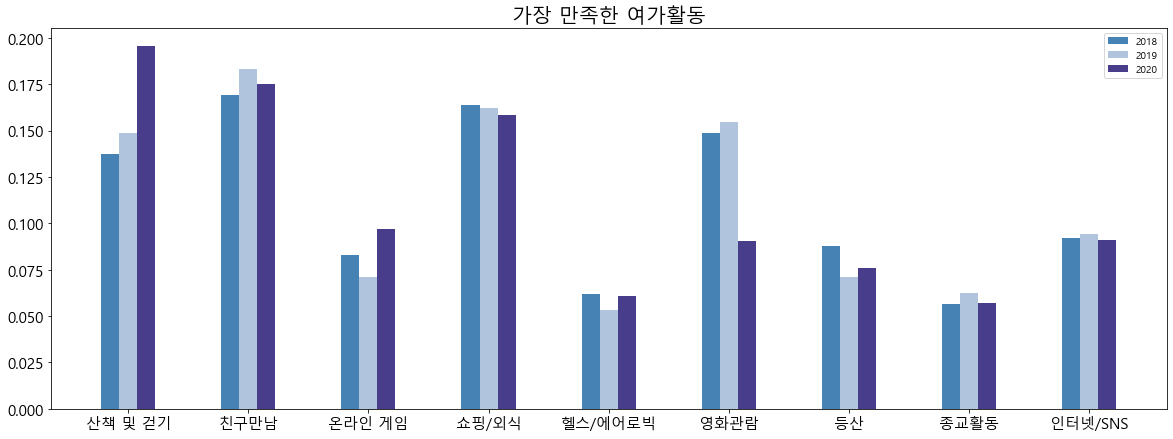

In [281]:
plt.figure(figsize=(20,7))

label=['산책 및 걷기',
               '친구만남','온라인 게임','쇼핑/외식',
               '헬스/에어로빅','영화관람','등산',
               '종교활동','인터넷/SNS']
plt.bar(manzoc.index-0.15,manzoc['2018']/manzoc['2018'].sum(),width=0.15,label = '2018',color ='steelblue') 
plt.bar(manzoc.index,manzoc['2019']/manzoc['2019'].sum(),width=0.15,label = '2019',color='lightsteelblue') 
plt.bar(manzoc.index+0.15,manzoc['2020']/manzoc['2020'].sum(),width=0.15,label = '2020', color = 'darkslateblue')


plt.xticks(manzoc.index,label,size=15)
plt.yticks(size=15)
plt.rc('font',family='Malgun Gothic')
plt.title('가장 만족한 여가활동', size=20)
plt.legend()
plt.show()

# Q2_2_1: 문2.지난 1년간 가장 많이 참여한 1순위 여가활동 동반자

In [198]:
cs_dongbanja_2018 = culture_survey_2018[['Q2A2','ID']]
cs_dongbanja_2019 = culture_survey_2019[['q2_2_1','pid']]
cs_dongbanja_2020 = culture_survey_2020[['q2_2_1','ID']]

In [199]:
cs_dongbanja_2018 = cs_dongbanja_2018.groupby(['Q2A2']).count()
cs_dongbanja_2018.columns=['2018_count']

cs_dongbanja_2019 = cs_dongbanja_2019.groupby(['q2_2_1']).count()
cs_dongbanja_2019.columns=['2019_count']

cs_dongbanja_2020 = cs_dongbanja_2020.groupby(['q2_2_1']).count()
cs_dongbanja_2020.columns=['2020_count']

In [200]:
whole_dbj = pd.concat([cs_dongbanja_2019,cs_dongbanja_2020],axis=1)
# whole_dbj = pd.concat([cs_dongbanja_2018,cs_dongbanja_2019,cs_dongbanja_2020],axis=1)

In [205]:
whole_dbj= whole_dbj.loc[[1,2,3,4,5]]

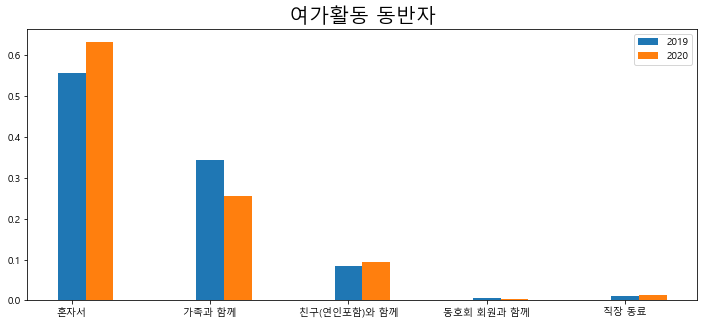

In [207]:
label=['혼자서','가족과 함께','친구(연인포함)와 함께','동호회 회원과 함께','직장 동료']

plt.figure(figsize=(12,5))

# plt.bar(whole_dbj.index-0.2,whole_dbj['2018_count']/whole_dbj['2018_count'].sum(),label='2018',width=0.2)
plt.bar(whole_dbj.index,whole_dbj['2019_count']/whole_dbj['2019_count'].sum(),label='2019',width=0.2)
plt.bar(whole_dbj.index+0.2,whole_dbj['2020_count']/whole_dbj['2020_count'].sum(),label='2020',width=0.2)

plt.xticks(whole_dbj.index,label,size=10)
plt.rc('font',family='Malgun Gothic')
plt.title('여가활동 동반자',size=20)
plt.legend()
plt.show()

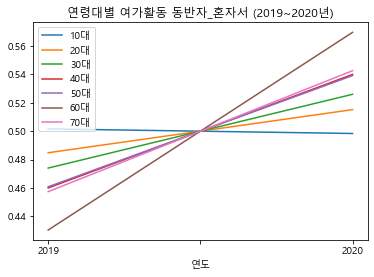

In [173]:
import numpy as np

cs_dongbanja_2019 = culture_survey_2019[['q2_2_1','DM2']]
cs_dongbanja_2019 =cs_dongbanja_2019[cs_dongbanja_2019['q2_2_1']==1.0]
cs_dongbanja_2019 = cs_dongbanja_2019.groupby(['DM2']).count()
cs_dongbanja_2019.columns=['2019']

cs_dongbanja_2020 = culture_survey_2020[['q2_2_1','DM2']]
cs_dongbanja_2020 =cs_dongbanja_2020[cs_dongbanja_2020['q2_2_1']==1.0]
cs_dongbanja_2020 = cs_dongbanja_2020.groupby(['DM2']).count()
cs_dongbanja_2020.columns=['2020']

cs_dongbanja = pd.concat([cs_dongbanja_2019,cs_dongbanja_2020],axis=1)
cs_dongbanja

a_10=pd.DataFrame(cs_dongbanja.loc[1])
a_10.index=[1,2]

a_20=pd.DataFrame(cs_dongbanja.loc[2])
a_20.index=[1,2]

a_30=pd.DataFrame(cs_dongbanja.loc[3])
a_30.index=[1,2]

a_40=pd.DataFrame(cs_dongbanja.loc[4])
a_40.index=[1,2]

a_50=pd.DataFrame(cs_dongbanja.loc[5])
a_50.index=[1,2]

a_60=pd.DataFrame(cs_dongbanja.loc[6])
a_60.index=[1,2]

a_70=pd.DataFrame(cs_dongbanja.loc[7])
a_70.index=[1,2]


plt.plot(a_10/a_10.sum(),label='10대')
plt.plot(a_20/a_20.sum(),label='20대')
plt.plot(a_30/a_30.sum(),label='30대')
plt.plot(a_40/a_40.sum(),label='40대')
plt.plot(a_50/a_50.sum(),label='50대')
plt.plot(a_60/a_60.sum(),label='60대')
plt.plot(a_70/a_70.sum(),label='70대')



plt.title('연령대별 여가활동 동반자_혼자서 (2019~2020년)')

plt.xlabel('연도')
plt.xticks(np.arange(1,2.5,0.5), labels=['2019',"",'2020'])
plt.legend()

## 동반자가 '혼자서'인 사람들의 연령대

In [62]:
cs_dongbanja_2018 = culture_survey_2018[['Q2A2','AGE_G1']]
cs_dongbanja_2019 = culture_survey_2019[['q2_2_1','DM2']]
cs_dongbanja_2020 = culture_survey_2020[['q2_2_1','DM2']]

In [63]:
cs_dongbanja_2018=cs_dongbanja_2018[cs_dongbanja_2018['Q2A2']==1.0]
cs_dongbanja_2019=cs_dongbanja_2019[cs_dongbanja_2019['q2_2_1']==1.0]
cs_dongbanja_2020=cs_dongbanja_2020[cs_dongbanja_2020['q2_2_1']==1.0]

In [65]:
cs_dongbanja_2018 = cs_dongbanja_2018.groupby(['AGE_G1']).count()
cs_dongbanja_2018.columns=['2018_count']

cs_dongbanja_2019 = cs_dongbanja_2019.groupby(['DM2']).count()
cs_dongbanja_2019.columns=['2019_count']

cs_dongbanja_2020 = cs_dongbanja_2020.groupby(['DM2']).count()
cs_dongbanja_2020.columns=['2020_count']

In [66]:
whole_dbj_nhj = pd.concat([cs_dongbanja_2018,cs_dongbanja_2019,cs_dongbanja_2020],axis=1)

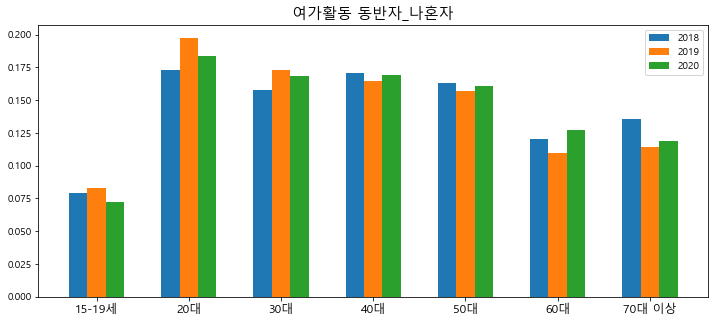

In [118]:
label=['15-19세','20대','30대','40대','50대','60대','70대 이상']

plt.figure(figsize=(12,5))

plt.bar(whole_dbj_nhj.index-0.2,whole_dbj_nhj['2018_count']/whole_dbj_nhj['2018_count'].sum(),label='2018',width=0.2)
plt.bar(whole_dbj_nhj.index,whole_dbj_nhj['2019_count']/whole_dbj_nhj['2019_count'].sum(),label='2019',width=0.2)
plt.bar(whole_dbj_nhj.index+0.2,whole_dbj_nhj['2020_count']/whole_dbj_nhj['2020_count'].sum(),label='2020',width=0.2)

plt.xticks(whole_dbj_nhj.index,label,size=12)
plt.rc('font',family='Malgun Gothic')
plt.title('여가활동 동반자_나혼자',size=15)
plt.legend()
plt.show()

# 문22. 동호회 참여 여부에 따른 연령대 

In [176]:
dhh_2018=culture_survey_2018[['Q22','AGE_G1']]
dhh_2019=culture_survey_2019[['q22','DM2']]
dhh_2020=culture_survey_2020[['q22','DM2']]

In [177]:
dhh_2018=dhh_2018[dhh_2018['Q22']==1.0]
dhh_2019=dhh_2019[dhh_2019['q22']==1.0]  #동호회 참여여부가 '예'인 사람들 추출
dhh_2020=dhh_2020[dhh_2020['q22']==1.0]  #동호회 참여여부가 '예'인 사람들 추출

In [178]:
dh_2018=dhh_2018.groupby(['AGE_G1']).count() #2018년에 동호회 활동한 사람 연령대
dh_2018.columns=['2018_count']

dh_2019=dhh_2019.groupby(['DM2']).count()  #2019년에 동호회 활동한 사람 연령대
dh_2019.columns=['2019_count']

dh_2020=dhh_2020.groupby(['DM2']).count()  #2020년에 동호회 활동한 사람 연령대
dh_2020.columns=['2020_count']

In [180]:
import pandas as pd
whole_dhh = pd.concat([dh_2018,dh_2019,dh_2020],axis=1)

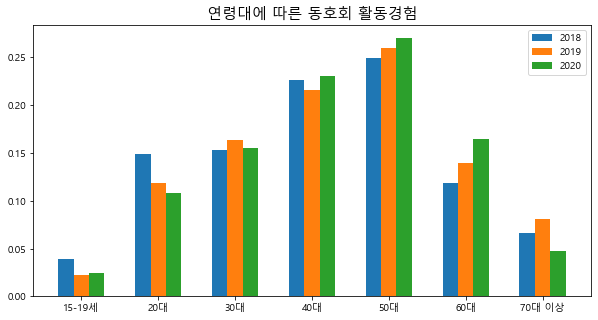

In [182]:
label=['15-19세','20대','30대','40대','50대','60대','70대 이상']

plt.figure(figsize=(10,5))

plt.bar(whole_dhh.index-0.2,whole_dhh['2018_count']/whole_dhh['2018_count'].sum(),label='2018',width=0.2)
plt.bar(whole_dhh.index,whole_dhh['2019_count']/whole_dhh['2019_count'].sum(),label='2019',width=0.2)
plt.bar(whole_dhh.index+0.2,whole_dhh['2020_count']/whole_dhh['2020_count'].sum(),label='2020',width=0.2)

plt.xticks(whole_dhh.index,label)
plt.rc('font',family='Malgun Gothic')
plt.title('연령대에 따른 동호회 활동경험',size=15)
plt.legend()
plt.show()


In [183]:
a_10=pd.DataFrame(whole_dhh.loc[1])
a_10.index=[1,2,3]

a_20=pd.DataFrame(whole_dhh.loc[2])
a_20.index=[1,2,3]

a_30=pd.DataFrame(whole_dhh.loc[3])
a_30.index=[1,2,3]

a_40=pd.DataFrame(whole_dhh.loc[4])
a_40.index=[1,2,3]

a_50=pd.DataFrame(whole_dhh.loc[5])
a_50.index=[1,2,3]

a_60=pd.DataFrame(whole_dhh.loc[6])
a_60.index=[1,2,3]

a_70=pd.DataFrame(whole_dhh.loc[7])
a_70.index=[1,2,3]

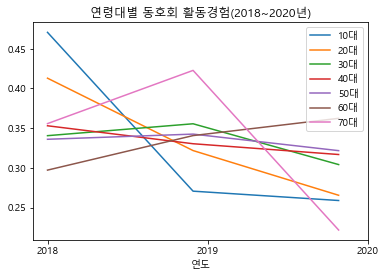

In [193]:
plt.plot(a_10/a_10.sum(),label='10대')
plt.plot(a_20/a_20.sum(),label='20대')
plt.plot(a_30/a_30.sum(),label='30대')
plt.plot(a_40/a_40.sum(),label='40대')
plt.plot(a_50/a_50.sum(),label='50대')
plt.plot(a_60/a_60.sum(),label='60대')
plt.plot(a_70/a_70.sum(),label='70대')
plt.title('연령대별 동호회 활동경험(2018~2020년)')

plt.xlabel('연도')
plt.xticks(np.arange(1,3.3,1.1), labels=['2018','2019','2020'])

plt.legend()

# 문16.집 외 가장 많이 이용한 여가공간 (1순위)

In [208]:
outhome_2018_1=culture_survey_2018[['Q16A1','AGE_G1']]
outhome_2019_1=culture_survey_2019[['q16','DM2']]
outhome_2020_1=culture_survey_2020[['q16','DM2']]

In [219]:
#2020 1순위
outhome_2020_1 = culture_survey_2020[['q16','DM2']] 
outhome_2020_1 = outhome_2020_1.groupby(['q16']).count()
outhome_2020_1 = outhome_2020_1.sort_values(by='DM2',ascending=False)
outhome_2020_1 = outhome_2020_1.loc[[69,53,32,33,39,11,45]]
outhome_2020_1.columns=['2020']

outhome_2020_1.index=['아파트내(집주변)공터',
               '생활권공원(근린공원, 소공원, 어린이공원 등)','카페(커피숍, 방탈출, VR카페, 이색 테마카페 등)','대형마트',
               '헬스클럽','영화관',
               '종교시설']



# #2019 1순위
outhome_2019_1 = culture_survey_2019[['q16','DM2']]
outhome_2019_1 = outhome_2019_1.groupby(['q16']).count()
outhome_2019_1 = outhome_2019_1.loc[[69,53,32,33,39,11,45]]
outhome_2019_1.columns=['2019']


outhome_2019_1.index=['아파트내(집주변)공터',
               '생활권공원(근린공원, 소공원, 어린이공원 등)','카페(커피숍, 방탈출, VR카페, 이색 테마카페 등)','대형마트',
               '헬스클럽','영화관',
               '종교시설']








# #2018 1순위
outhome_2018_1 = culture_survey_2018[['Q16A1','AGE_G1']]
outhome_2018_1 = outhome_2018_1.groupby(['Q16A1']).count()
outhome_2018_1=pd.DataFrame(outhome_2018_1)
outhome_2018_1 = outhome_2018_1.loc[[67,51,32,33,39,11,44]]

outhome_2018_1.index=['아파트내(집주변)공터',
               '생활권공원(근린공원, 소공원, 어린이공원 등)','카페(커피숍, 방탈출, VR카페, 이색 테마카페 등)','대형마트',
               '헬스클럽','영화관',
              '종교시설']


outhome_2018_1.columns=['2018']



In [220]:
outhome = pd.concat([outhome_2018_1,outhome_2019_1,outhome_2020_1],axis=1)

In [221]:
outhome.index=[1,2,3,4,5,6,7]
outhome

,2018,2019,2020
1,839,1091,1292
2,721,506,873
3,614,580,872
4,375,515,493
5,463,419,400
6,660,956,323
7,318,331,256


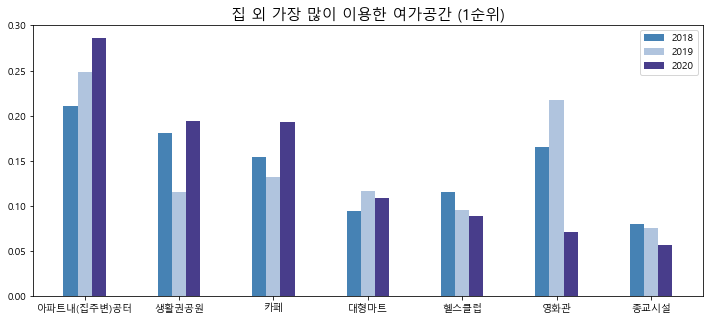

In [282]:
plt.figure(figsize=(12,5))
label=['아파트내(집주변)공터',
               '생활권공원','카페','대형마트',
               '헬스클럽','영화관','종교시설']

plt.bar(outhome.index-0.15,outhome['2018']/outhome['2018'].sum(),label='2018',width=0.15 , color ='steelblue' )
plt.bar(outhome.index,outhome['2019']/outhome['2019'].sum(),label='2019',width=0.15,color='lightsteelblue' )
plt.bar(outhome.index+0.15,outhome['2020']/outhome['2020'].sum(),label='2020',width=0.15, color ='darkslateblue')

plt.xticks(outhome.index,label)
plt.rc('font',family='Malgun Gothic')
plt.title('집 외 가장 많이 이용한 여가공간 (1순위)',size=15)
plt.legend()
plt.show()